
 <font size=+7 color="#3D3D3D"><center><b>Startup_funding</b></center></font>



 <font size=+2 color="#3D3D3D"><b>Importing Libraries & Data:</b></center></font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import time

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/startupsucess/startup data.csv')
df1=df_data.copy()

In [4]:
df_data.head().T

,0,1,2,3,4
Unnamed: 0,1005,204,1001,738,1002
state_code,CA,CA,CA,CA,CA
latitude,42.35888,37.238916,32.901049,37.320309,37.779281
longitude,-71.05682,-121.973718,-117.192656,-122.05004,-122.419236
zip_code,92101,95032,92121,95014,94105
id,c:6669,c:16283,c:65620,c:42668,c:65806
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco
Unnamed: 6,NaN,NaN,San Diego CA 92121,Cupertino CA 95014,San Francisco CA 94105
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
labels,1,1,1,1,0


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [6]:
len(df_data.columns)

49

In [7]:
def nullValues(df):
    total=df.isnull().sum()
    percent=df.isnull().sum()/df.isnull().count()*100
    null_df=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    null_df=null_df[null_df["Percent"]>0]
    null_df=null_df.sort_values(by="Percent",ascending=False)
    print(pd.DataFrame(null_df))
    plt.figure(figsize=(16,10))
    sn.barplot(x=null_df.index,y=null_df["Percent"],color="g")
    plt.xticks(rotation=90)
    plt.xlabel("Null_value_Column")
    plt.ylabel("Percent")

                          Total    Percent
closed_at                   588  63.705309
Unnamed: 6                  493  53.412784
age_first_milestone_year    152  16.468039
age_last_milestone_year     152  16.468039
state_code.1                  1   0.108342


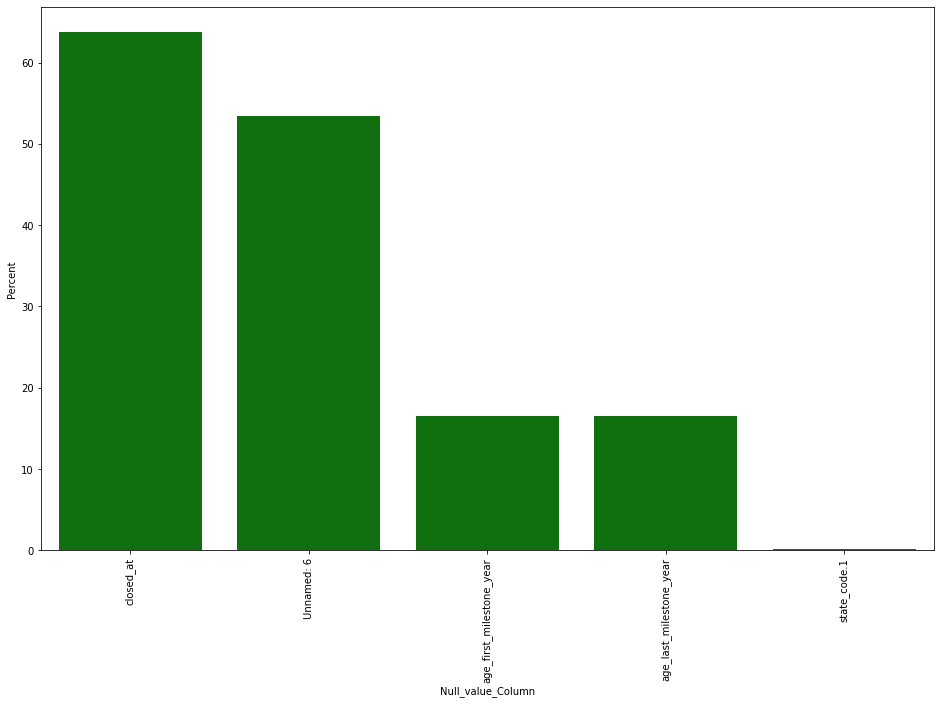

In [8]:
nullValues(df_data)

In [9]:
df_data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [10]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.0,5.722979e+02,3.335854e+02,1.000000,2.835000e+02,5.770000e+02,8.665000e+02,1.153000e+03
latitude,923.0,3.851744e+01,3.741497e+00,25.752358,3.738887e+01,3.777928e+01,4.073065e+01,5.933523e+01
longitude,923.0,-1.035392e+02,2.239417e+01,-122.756956,-1.221987e+02,-1.183740e+02,-7.721473e+01,1.805712e+01
labels,923.0,6.468039e-01,4.782221e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
age_first_funding_year,923.0,2.235630e+00,2.510449e+00,-9.046600,5.767000e-01,1.446600e+00,3.575350e+00,2.189590e+01
age_last_funding_year,923.0,3.931456e+00,2.967910e+00,-9.046600,1.669850e+00,3.528800e+00,5.560250e+00,2.189590e+01
age_first_milestone_year,771.0,3.055353e+00,2.977057e+00,-14.169900,1.000000e+00,2.520500e+00,4.686300e+00,2.468490e+01
age_last_milestone_year,771.0,4.754423e+00,3.212107e+00,-7.005500,2.411000e+00,4.476700e+00,6.753400e+00,2.468490e+01
relationships,923.0,7.710726e+00,7.265776e+00,0.000000,3.000000e+00,5.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,923.0,2.310943e+00,1.390922e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01


In [11]:
df_data['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [12]:
len(df_data['name'].value_counts())

922

In [13]:
len(df_data['category_code'].value_counts())

35

In [14]:
plt.figure(figsize=(25,20))
px.scatter(df1,x='has_VC', y='funding_total_usd', color=df1['status'])

<Figure size 1800x1440 with 0 Axes>

In [15]:
plt.figure(figsize=(25,20))
px.scatter(df1,x='relationships', y='funding_total_usd', color=df1['status'])

<Figure size 1800x1440 with 0 Axes>

In [16]:
plt.figure(figsize=(25,20))
px.scatter(df1,x='funding_total_usd', y='name', color=df1['status'])


<Figure size 1800x1440 with 0 Axes>

In [17]:
df_data.drop([364],axis=0,inplace=True)
df_data.reset_index(0,2000)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
918,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
919,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
920,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [18]:
df_data.shape

(922, 49)

In [19]:
plt.figure(figsize=(25,20))
px.scatter(df1,x='name', y='funding_total_usd', color=df1['status'])

<Figure size 1800x1440 with 0 Axes>

In [20]:
plt.figure(figsize=(25,20))
px.scatter(df_data,x='name', y='funding_total_usd', color=df_data['is_ecommerce'])

<Figure size 1800x1440 with 0 Axes>

In [21]:
plt.figure(figsize=(25,20))
px.scatter(df_data,x='labels', y='funding_total_usd', color=df_data['status'])

<Figure size 1800x1440 with 0 Axes>

In [22]:
plt.figure(figsize=(25,20))
px.scatter(df_data,x='labels', y='funding_total_usd', color=df_data['status'])

<Figure size 1800x1440 with 0 Axes>

In [23]:
plt.figure(figsize=(25,20))
px.scatter(df_data,x='has_roundD', y='funding_total_usd', color=df_data['status'])

<Figure size 1800x1440 with 0 Axes>

In [24]:
plt.figure(figsize=(25,20))

px.scatter(df_data,x='is_othercategory', y='funding_total_usd', color=df_data['status'])

<Figure size 1800x1440 with 0 Axes>

In [25]:
plt.figure(figsize=(25,20))

px.scatter(df_data,x='labels', y='funding_total_usd', color=df_data['status'])

<Figure size 1800x1440 with 0 Axes>

In [26]:
df_data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [27]:
df1[df1['funding_total_usd']==5700000000].T

,364
Unnamed: 0,86
state_code,WA
latitude,30.63248
longitude,-86.984345
zip_code,98033
id,c:13219
city,Kirkland
Unnamed: 6,NaN
name,Clearwire
labels,1


In [28]:
df1.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [29]:
cat_df = list(df_data.select_dtypes(include='object').columns)
dis_df = list(df_data.select_dtypes(include='int64').columns)

In [30]:
cat_df,dis_df

(['state_code',
  'zip_code',
  'id',
  'city',
  'Unnamed: 6',
  'name',
  'founded_at',
  'closed_at',
  'first_funding_at',
  'last_funding_at',
  'state_code.1',
  'category_code',
  'object_id',
  'status'],
 ['Unnamed: 0',
  'labels',
  'relationships',
  'funding_rounds',
  'funding_total_usd',
  'milestones',
  'is_CA',
  'is_NY',
  'is_MA',
  'is_TX',
  'is_otherstate',
  'is_software',
  'is_web',
  'is_mobile',
  'is_enterprise',
  'is_advertising',
  'is_gamesvideo',
  'is_ecommerce',
  'is_biotech',
  'is_consulting',
  'is_othercategory',
  'has_VC',
  'has_angel',
  'has_roundA',
  'has_roundB',
  'has_roundC',
  'has_roundD',
  'is_top500'])

In [31]:
for val in cat_df:
  if len(df_data[val].value_counts())<50:
         print(val)
         print('*'*50)
         print(pd.unique(df_data[val]))


state_code
**************************************************
['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' 'AZ' 'ID' 'AR' 'WI']
state_code.1
**************************************************
['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' nan 'AZ' 'ID' 'AR' 'WI']
category_code
**************************************************
['music' 'enterprise' 'web' 'software' 'games_video' 'network_hosting'
 'finance' 'mobile' 'education' 'public_relations' 'security' 'other'
 'photo_video' 'hardware' 'ecommerce' 'advertising' 'travel' 'fashion'
 'analytics' 'consulting' 'biotech' 'cleantech' 'search' 'semiconductor'
 'social' 'medical' 'automotive' 'messaging' 'manufacturing' 'hospitality'
 'news' 'transportation' 'sports' 'real_estate' 'health']
status
**********************

In [32]:

df_data.drop(axis=1,columns=['founded_at','first_funding_at','last_funding_at','state_code.1','closed_at','Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6',   'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year',  'milestones',  'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code','object_id'],inplace=True)

In [33]:

df_data.drop(axis=1,columns=['labels'],inplace=True)

In [34]:
df_data.head().T

,0,1,2,3,4
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
relationships,3,9,5,5,2
funding_rounds,3,4,1,3,2
funding_total_usd,375000,40100000,2600000,40000000,1300000
is_software,0,0,0,1,0
is_web,0,0,1,0,0
is_mobile,0,0,0,0,0
is_enterprise,0,1,0,0,0
is_advertising,0,0,0,0,0
is_gamesvideo,0,0,0,0,1


In [35]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
relationships,922.0,7.698482e+00,7.260185e+00,0.0,3.0,5.0,1.000000e+01,63.0
funding_rounds,922.0,2.309111e+00,1.390562e+00,1.0,1.0,2.0,3.000000e+00,10.0
funding_total_usd,922.0,1.926511e+07,3.161304e+07,11000.0,2712500.0,10000000.0,2.465264e+07,510000000.0
is_software,922.0,1.659436e-01,3.722319e-01,0.0,0.0,0.0,0.000000e+00,1.0
is_web,922.0,1.561822e-01,3.632250e-01,0.0,0.0,0.0,0.000000e+00,1.0
is_mobile,922.0,8.459870e-02,2.784346e-01,0.0,0.0,0.0,0.000000e+00,1.0
is_enterprise,922.0,7.917570e-02,2.701593e-01,0.0,0.0,0.0,0.000000e+00,1.0
is_advertising,922.0,6.724512e-02,2.505820e-01,0.0,0.0,0.0,0.000000e+00,1.0
is_gamesvideo,922.0,5.639913e-02,2.308161e-01,0.0,0.0,0.0,0.000000e+00,1.0
is_ecommerce,922.0,2.711497e-02,1.625066e-01,0.0,0.0,0.0,0.000000e+00,1.0


In [36]:
df_data.columns

Index(['name', 'relationships', 'funding_rounds', 'funding_total_usd',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [37]:
df_data[['funding_total_usd','avg_participants','funding_rounds']].corr().T

,funding_total_usd,avg_participants,funding_rounds
funding_total_usd,1.000000,0.130807,0.458584
avg_participants,0.130807,1.000000,0.042098
funding_rounds,0.458584,0.042098,1.000000


In [38]:

df_data[['is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory',]].corr().T

,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory
is_software,1.000000,-0.191900,-0.135600,-0.130795,-0.119765,-0.109050,-0.074466,-0.087280,-0.025485,-0.308247
is_web,-0.191900,1.000000,-0.130788,-0.126153,-0.115515,-0.105180,-0.071823,-0.084183,-0.024581,-0.297308
is_mobile,-0.135600,-0.130788,1.000000,-0.089142,-0.081625,-0.074322,-0.050752,-0.059485,-0.017369,-0.210083
is_enterprise,-0.130795,-0.126153,-0.089142,1.000000,-0.078733,-0.071689,-0.048953,-0.057377,-0.016754,-0.202639
is_advertising,-0.119765,-0.115515,-0.081625,-0.078733,1.000000,-0.065643,-0.044825,-0.052539,-0.015341,-0.185551
is_gamesvideo,-0.109050,-0.105180,-0.074322,-0.071689,-0.065643,1.000000,-0.040815,-0.047838,-0.013968,-0.168950
is_ecommerce,-0.074466,-0.071823,-0.050752,-0.048953,-0.044825,-0.040815,1.000000,-0.032667,-0.009538,-0.115369
is_biotech,-0.087280,-0.084183,-0.059485,-0.057377,-0.052539,-0.047838,-0.032667,1.000000,-0.011180,-0.135222
is_consulting,-0.025485,-0.024581,-0.017369,-0.016754,-0.015341,-0.013968,-0.009538,-0.011180,1.000000,-0.039484
is_othercategory,-0.308247,-0.297308,-0.210083,-0.202639,-0.185551,-0.168950,-0.115369,-0.135222,-0.039484,1.000000


In [39]:
df_data[['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']].corr().T

,has_roundA,has_roundB,has_roundC,has_roundD
has_roundA,1.000000,0.243722,-0.007006,-0.078166
has_roundB,0.243722,1.000000,0.312965,0.088026
has_roundC,-0.007006,0.312965,1.000000,0.312764
has_roundD,-0.078166,0.088026,0.312764,1.000000


In [40]:
df_data[['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD','has_VC']].corr().T

,has_roundA,has_roundB,has_roundC,has_roundD,has_VC
has_roundA,1.000000,0.243722,-0.007006,-0.078166,-0.199463
has_roundB,0.243722,1.000000,0.312965,0.088026,-0.005589
has_roundC,-0.007006,0.312965,1.000000,0.312764,0.059130
has_roundD,-0.078166,0.088026,0.312764,1.000000,0.022884
has_VC,-0.199463,-0.005589,0.059130,0.022884,1.000000


In [41]:
df_data[['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']].describe().T

,count,mean,std,min,25%,50%,75%,max
has_roundA,922.0,0.508677,0.500196,0.0,0.0,1.0,1.0,1.0
has_roundB,922.0,0.392625,0.488600,0.0,0.0,0.0,1.0,1.0
has_roundC,922.0,0.233189,0.423091,0.0,0.0,0.0,0.0,1.0
has_roundD,922.0,0.099783,0.299873,0.0,0.0,0.0,0.0,1.0


In [42]:
df_data.drop(axis=1,columns=['name'],inplace=True)

In [43]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   relationships      922 non-null    int64  
 1   funding_rounds     922 non-null    int64  
 2   funding_total_usd  922 non-null    int64  
 3   is_software        922 non-null    int64  
 4   is_web             922 non-null    int64  
 5   is_mobile          922 non-null    int64  
 6   is_enterprise      922 non-null    int64  
 7   is_advertising     922 non-null    int64  
 8   is_gamesvideo      922 non-null    int64  
 9   is_ecommerce       922 non-null    int64  
 10  is_biotech         922 non-null    int64  
 11  is_consulting      922 non-null    int64  
 12  is_othercategory   922 non-null    int64  
 13  has_VC             922 non-null    int64  
 14  has_angel          922 non-null    int64  
 15  has_roundA         922 non-null    int64  
 16  has_roundB         922 non

In [44]:
for i in df_data.columns:
  print(df_data[i].value_counts())
  print('*'*50)

3     100
5      98
4      90
2      79
6      71
1      63
7      45
9      43
8      41
10     41
0      37
12     27
13     26
11     22
15     19
16     18
14     15
18     10
21     10
17      9
19      7
25      5
27      5
22      5
23      5
24      4
30      4
26      3
37      3
28      3
35      3
29      2
31      1
42      1
63      1
33      1
45      1
20      1
57      1
32      1
38      1
Name: relationships, dtype: int64
**************************************************
1     317
2     280
3     167
4      89
5      40
7      13
6      13
8       2
10      1
Name: funding_rounds, dtype: int64
**************************************************
10000000    24
5000000     21
4000000     20
1000000     16
2000000     16
            ..
22500000     1
6700000      1
662000       1
3600000      1
15500000     1
Name: funding_total_usd, Length: 504, dtype: int64
**************************************************
0    769
1    153
Name: is_software, dtype: int64
************

In [46]:
df_data.to_csv('/content/drive/MyDrive/Colab Notebooks/startupsucess/startup_sucess.csv')

In [ ]:
#Train test Split
X=df_data.drop(['status'],axis=1)
y=pd.get_dummies(df_data['status'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  

from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.ensemble  import AdaBoostClassifier
from  xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


import time

In [ ]:
models = [LogisticRegression(),AdaBoostClassifier(),XGBClassifier(),BernoulliNB(),
          KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []

In [ ]:
x_train.shape,x_test.shape

In [ ]:

for model in models:
    name = type(model).__name__
    Name.append(name)
    model = OneVsRestClassifier(model)
    begin = time.time()
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    end = time.time()
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

In [ ]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Recall,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

In [ ]:
model=RandomForestClassifier()
model = OneVsRestClassifier(model)
begin = time.time()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
end = time.time()
print(accuracy_score(prediction,y_test))
print(precision_score(prediction,y_test,average = 'macro'))
print(recall_score(prediction,y_test,average = 'macro'))
print(f1_score(prediction,y_test,average = 'macro'))

In [ ]:
# Saving model to disk
from pickle import dump
dump(model,open('/content/drive/MyDrive/Colab Notebooks/startupsucess/RandomForestClassifier.pkl','wb'))